```Import All Need Tools```

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2, l1_l2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump

```Preparing & Preprocessing Data```

In [ ]:
Columns = ['Preg', 'Glu', 'Pres', 'Skin', 'Ins', 'BMI', 'Pedi', 'Age', 'Out']
Data = pd.read_csv('Pima-indians-diabetes.csv', names=Columns)

DataX = Data.values[:,0:8]
DataY = Data.values[:,8]
normalize = MinMaxScaler(feature_range = (0, 1))
X_Normalized = normalize.fit_transform(DataX)

```Train Model Function```

In [ ]:
def TrainModel(Model, ModelName, Explain):
  Model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  ModelHistory = Model.fit(X_Normalized, DataY, validation_split = 0.1,\
                                    epochs = 120, batch_size = 20, verbose=0)
  dump(Model, f'{ModelName}.joblib')

  ModelDict = ModelHistory.history
  MainLoss = ModelDict['loss']
  ValLoss = ModelDict['val_loss']
  MainAccuracy = ModelDict['accuracy']
  ValAccuracy = ModelDict['val_accuracy']

  # Draw Loss Plot
  plt.plot(MainLoss, color = 'blue', label = 'Traning Data Loss')
  plt.plot(ValLoss, color = 'red', label = 'Validation Data Loss')
  plt.title(f'Train & Validation Loss With Prevent Overfitting Using {Explain}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Draw Accuracy Plot
  plt.plot(MainAccuracy, color = 'blue', label = 'Traning Data Accuracy')
  plt.plot(ValAccuracy, color = 'red', label = 'Validation Data Accuracy')
  plt.title(f'Train & Validation Accuracy With Prevent Overfitting Using {Explain}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

INFO:tensorflow:Assets written to: ram://9991e49a-642a-48ba-ba58-9e282541bff9/assets


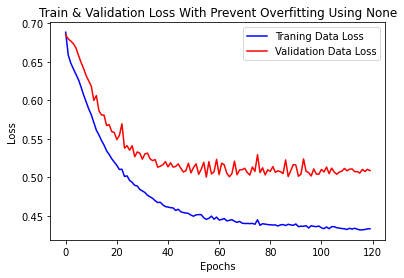

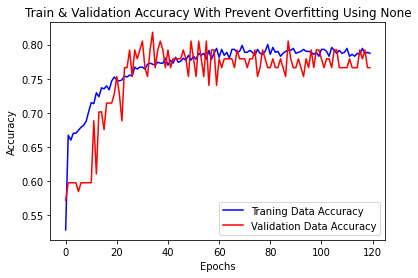

In [ ]:
MainModel = Sequential([
Dense(16, input_dim = 8, activation='relu'),
Dense(5, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

TrainModel(MainModel, 'Main Model', 'None')

INFO:tensorflow:Assets written to: ram://4ef285d5-200b-4a7a-9dc5-5f04ec5da126/assets


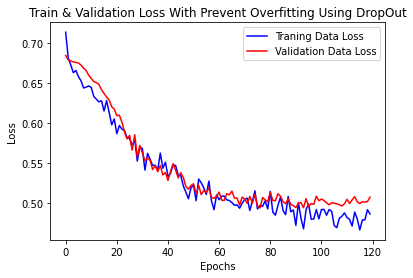

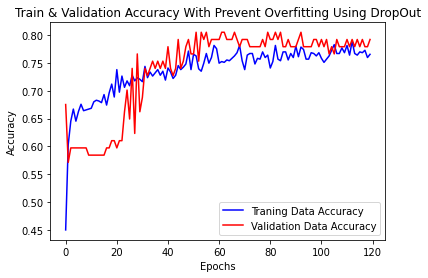

In [ ]:
ModelWithDropOut = Sequential([
Dense(16, input_dim = 8, activation='relu'),
Dropout(0.2),
Dense(5, activation = 'relu'),
Dropout(0.2),
    Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithDropOut, 'Model With DropOut', 'DropOut')

INFO:tensorflow:Assets written to: ram://1bfff527-0e76-4fec-9780-ceeca775e94d/assets


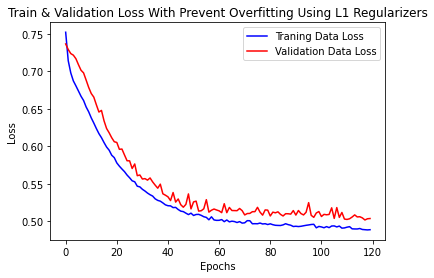

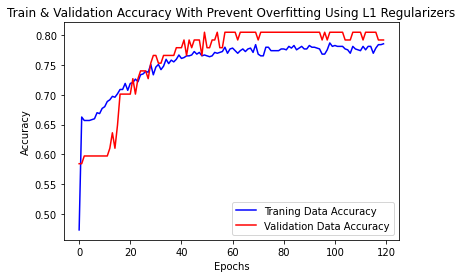

In [ ]:
ModelWithL1Regularizers = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l1(0.001)),
Dense(5, activation = 'relu',kernel_regularizer=l1(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1Regularizers, 'Model With L1 Regularizers', 'L1 Regularizers')

INFO:tensorflow:Assets written to: ram://21e1ce86-2bae-498b-95c9-020b066047ec/assets


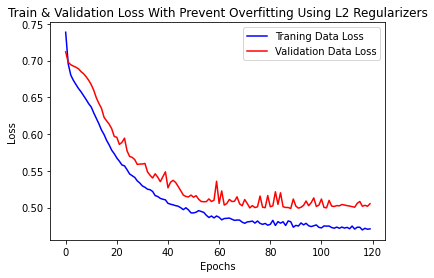

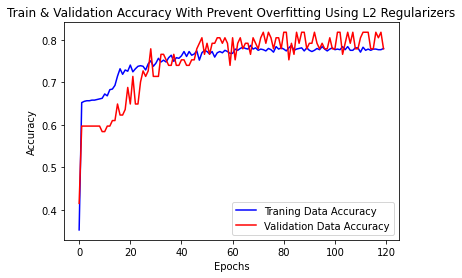

In [ ]:
ModelWithL2Regularizers = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l2(0.001)),
Dense(5, activation = 'relu',kernel_regularizer=l2(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL2Regularizers, 'Model With L2 Regularizers', 'L2 Regularizers')

INFO:tensorflow:Assets written to: ram://bfb863bd-b099-4a7f-a9df-544ad7983fc0/assets


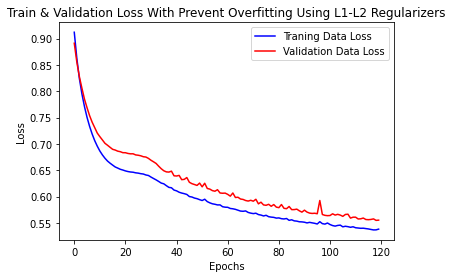

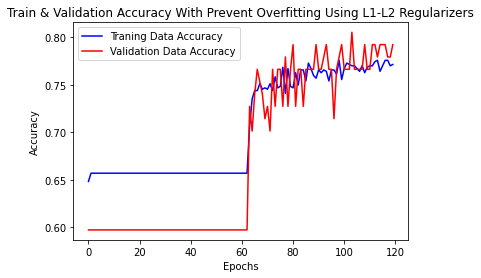

In [ ]:
ModelWithL1L2Regularizers = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l1_l2(0.001)),
Dense(5, activation = 'relu',kernel_regularizer=l1_l2(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1L2Regularizers, 'Model With L1-L2 Regularizers', 'L1-L2 Regularizers')

INFO:tensorflow:Assets written to: ram://777d8675-a626-4d44-b450-0ee6009936e8/assets


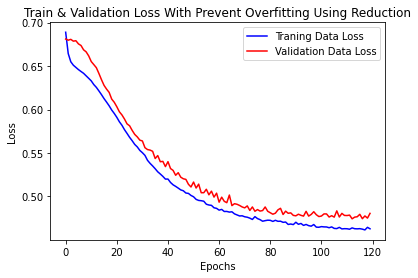

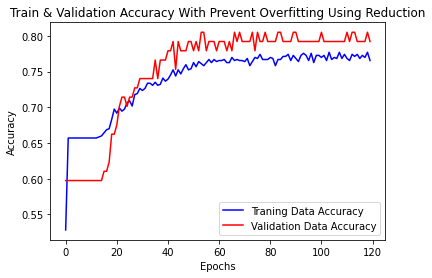

In [ ]:
ModelReduced = Sequential([
Dense(8, input_dim = 8, activation='relu'),
Dense(3, activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelReduced, 'Model Reduced', 'Reduction')

INFO:tensorflow:Assets written to: ram://108d7fe5-2c2e-4b3c-b861-2ec0c6b02c70/assets


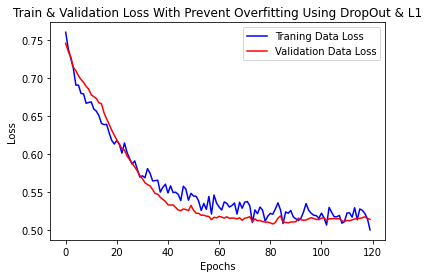

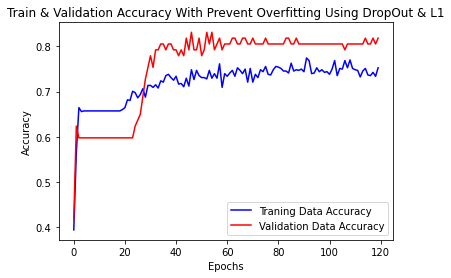

In [ ]:
ModelWithDropOutAndL1 = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l1(0.001)),
Dropout(0.2),
Dense(5, activation = 'relu',kernel_regularizer=l1(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithDropOutAndL1, 'Model With DropOut And L1', 'DropOut & L1')

INFO:tensorflow:Assets written to: ram://39f2ff3e-1557-48f5-9988-21306bf3f644/assets


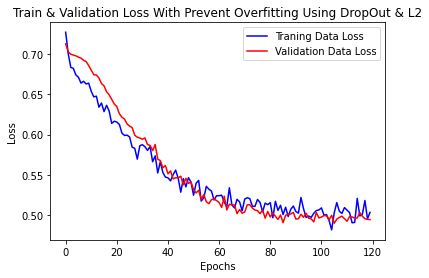

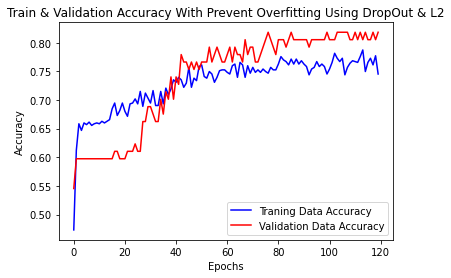

In [ ]:
ModelWithDropOutAndL2 = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l2(0.001)),
Dropout(0.2),
Dense(5, activation = 'relu',kernel_regularizer=l2(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithDropOutAndL2, 'Model With DropOut And L2', 'DropOut & L2')

INFO:tensorflow:Assets written to: ram://2fe72fb3-4ed1-489e-9509-523730184dfb/assets


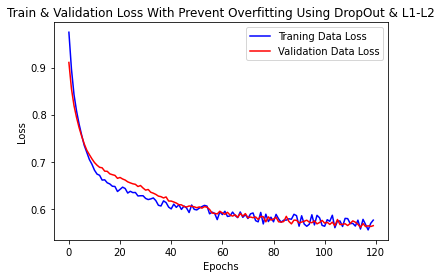

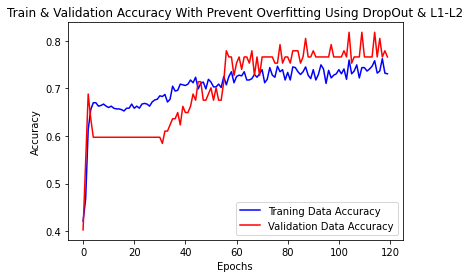

In [ ]:
ModelWithDropOutAndL1L2 = Sequential([
Dense(16, input_dim = 8, activation='relu',kernel_regularizer=l1_l2(0.001)),
Dropout(0.2),
Dense(5, activation = 'relu',kernel_regularizer=l1_l2(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithDropOutAndL1L2, 'Model With DropOut And L1-L2', 'DropOut & L1-L2')

INFO:tensorflow:Assets written to: ram://f8586ba5-d54a-4fe9-9ae9-a2cad98efb01/assets


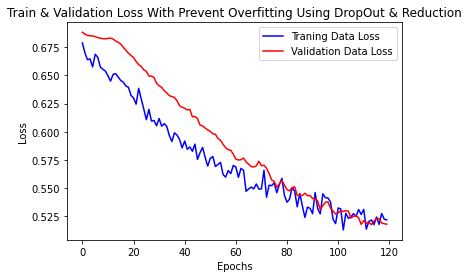

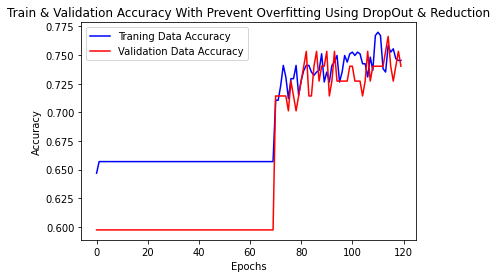

In [ ]:
ModelWithDropOutAndReduction = Sequential([
Dense(8, input_dim = 8, activation='relu'),
Dropout(0.2),
Dense(3, activation = 'relu'),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithDropOutAndReduction, 'Model With DropOut And Reduction', 'DropOut & Reduction')

INFO:tensorflow:Assets written to: ram://67fe3de6-01e6-4ca6-abad-7934156a6138/assets


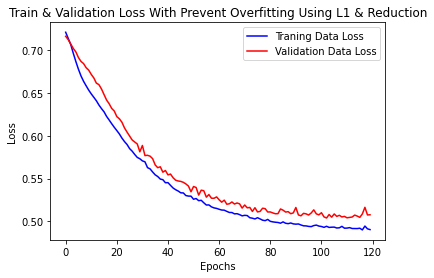

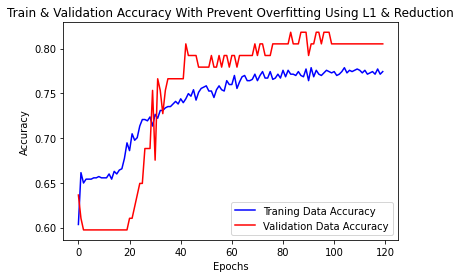

In [ ]:
ModelWithL1AndReduction = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l1(0.001)),
Dense(3, activation = 'relu', kernel_regularizer=l1(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1AndReduction, 'Model With L1 And Reduction', 'L1 & Reduction')

INFO:tensorflow:Assets written to: ram://ea510423-c128-4e59-985b-b5244d3c1625/assets


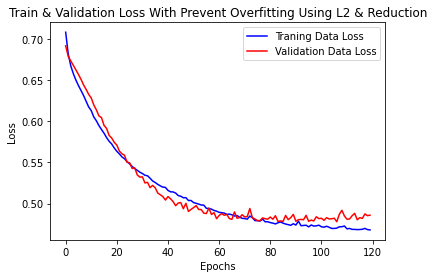

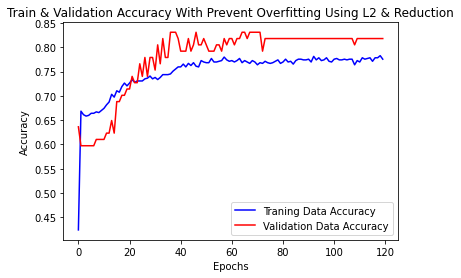

In [ ]:
ModelWithL2AndReduction = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l2(0.001)),
Dense(3, activation = 'relu', kernel_regularizer=l2(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL2AndReduction, 'Model With L2 And Reduction', 'L2 & Reduction')

INFO:tensorflow:Assets written to: ram://5ef57e69-a664-4303-9799-8f28c7a8c0ff/assets


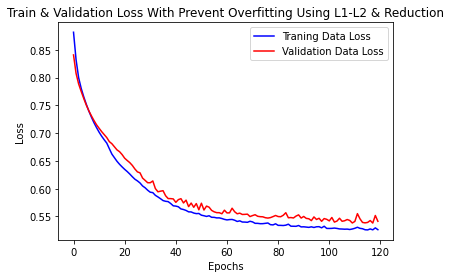

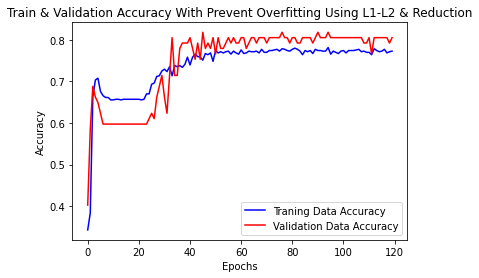

In [ ]:
ModelWithL1L2AndReduction = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l1_l2(0.001)),
Dense(3, activation = 'relu', kernel_regularizer=l1_l2(0.001)),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1L2AndReduction, 'Model With L1-L2 And Reduction', 'L1-L2 & Reduction')

INFO:tensorflow:Assets written to: ram://a8a6ea1b-98d6-468d-a53b-fa90805f03bb/assets


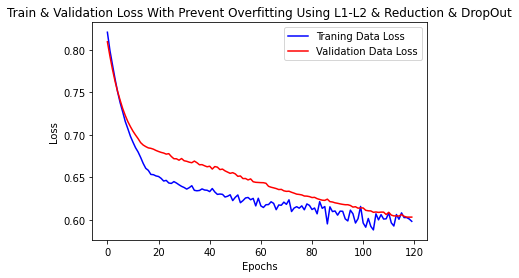

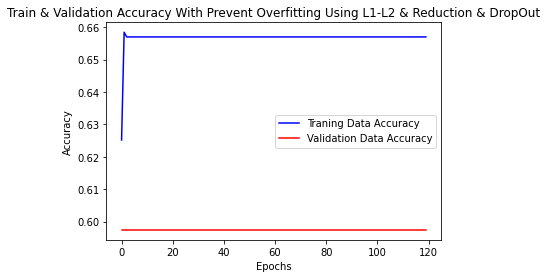

In [ ]:
ModelWithL1L2AndReductionAndDropOut = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l1_l2(0.001)),
Dropout(0.2),
Dense(3, activation = 'relu', kernel_regularizer=l1_l2(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1L2AndReductionAndDropOut, 'Model With L1-L2 And Reduction And DropOut',\
           'L1-L2 & Reduction & DropOut')

INFO:tensorflow:Assets written to: ram://a363f804-b77c-4445-a202-aaecdd1820cb/assets


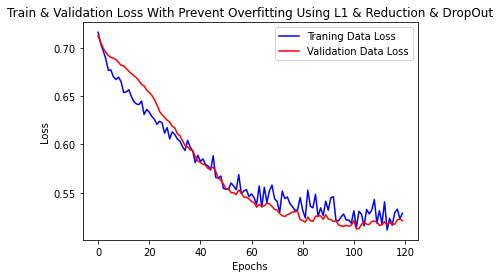

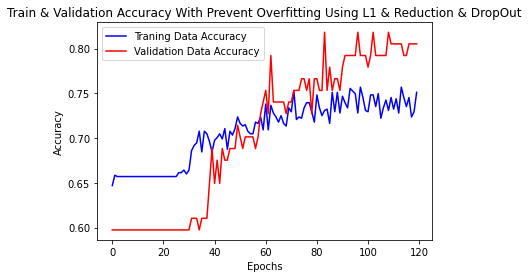

In [ ]:
ModelWithL1AndReductionAndDropOut = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l1(0.001)),
Dropout(0.2),
Dense(3, activation = 'relu', kernel_regularizer=l1(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL1AndReductionAndDropOut, 'Model With L1 And Reduction And DropOut',\
           'L1 & Reduction & DropOut')

INFO:tensorflow:Assets written to: ram://1e101796-d10b-4763-95fe-4f1e31f04951/assets


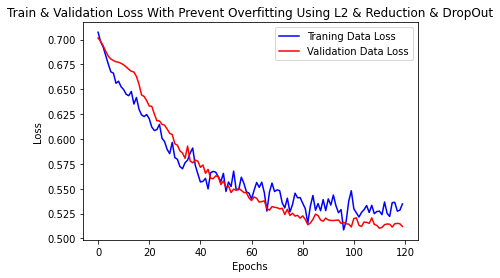

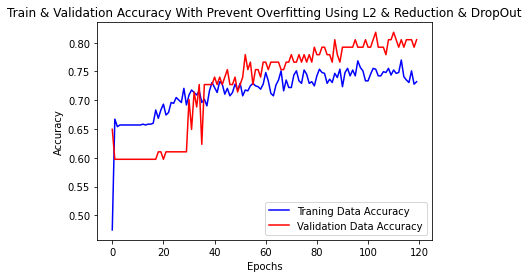

In [ ]:
ModelWithL2AndReductionAndDropOut = Sequential([
Dense(8, input_dim = 8, activation='relu', kernel_regularizer=l2(0.001)),
Dropout(0.2),
Dense(3, activation = 'relu', kernel_regularizer=l2(0.001)),
Dropout(0.2),
Dense(1, activation = 'sigmoid'),
])
TrainModel(ModelWithL2AndReductionAndDropOut, 'Model With L2 And Reduction And DropOut',\
           'L2 & Reduction & DropOut')